# Binary Prediction With A Rainfall Dataset

## Setting Up The Environment

In [20]:
# core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# models for binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Loading The Data 

In [2]:
# importing files
test = pd.read_csv('data/playground-series-s5e3/test.csv')
train = pd.read_csv('data/playground-series-s5e3/train.csv')

In [3]:
test

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5


In [4]:
train 

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


## Statistical Summary

In [7]:
train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [8]:
test.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,729.000000,730.000000
mean,2554.500000,183.000000,1013.503014,26.372466,23.963288,22.110274,20.460137,82.669863,76.360274,3.664384,103.923182,22.484247
std,210.877136,105.438271,5.505871,5.672521,5.278098,5.170744,5.391169,7.818714,17.934121,3.639272,81.695458,9.954779
min,2190.000000,1.000000,1000.000000,7.400000,5.900000,4.200000,-0.000000,39.000000,0.000000,0.000000,10.000000,4.500000
25%,2372.250000,92.000000,1008.725000,21.600000,19.825000,17.825000,16.800000,77.250000,69.000000,0.325000,40.000000,14.500000
50%,2554.500000,183.000000,1012.700000,27.800000,25.650000,23.900000,22.300000,82.000000,83.000000,2.200000,70.000000,21.300000
75%,2736.750000,274.000000,1017.600000,31.000000,28.375000,26.400000,25.000000,89.000000,88.000000,6.675000,200.000000,28.400000
max,2919.000000,365.000000,1032.200000,35.800000,31.800000,29.100000,26.700000,98.000000,100.000000,11.800000,300.000000,59.500000


## Target Distribution 

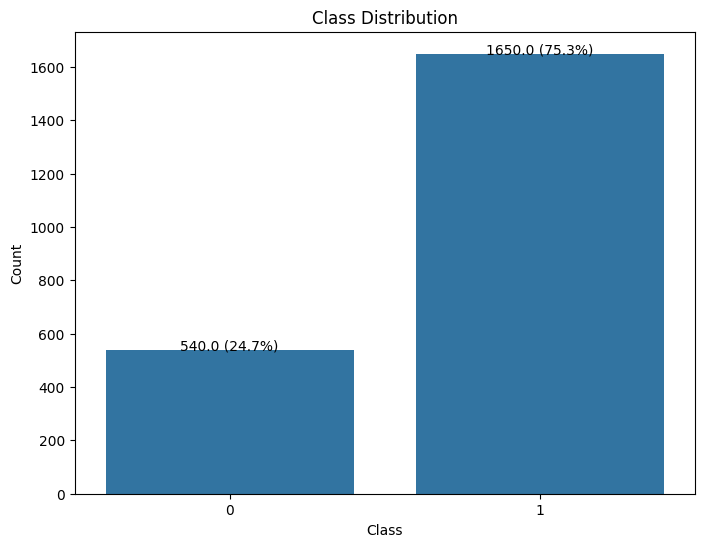

In [9]:
# visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rainfall', data=train)  # Replace 'target' with your target column name
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# calculating percentage of each class
total = len(train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{height} ({height/total:.1%})',
            ha="center")
plt.show()

## Corelation Matrix 

<Axes: >

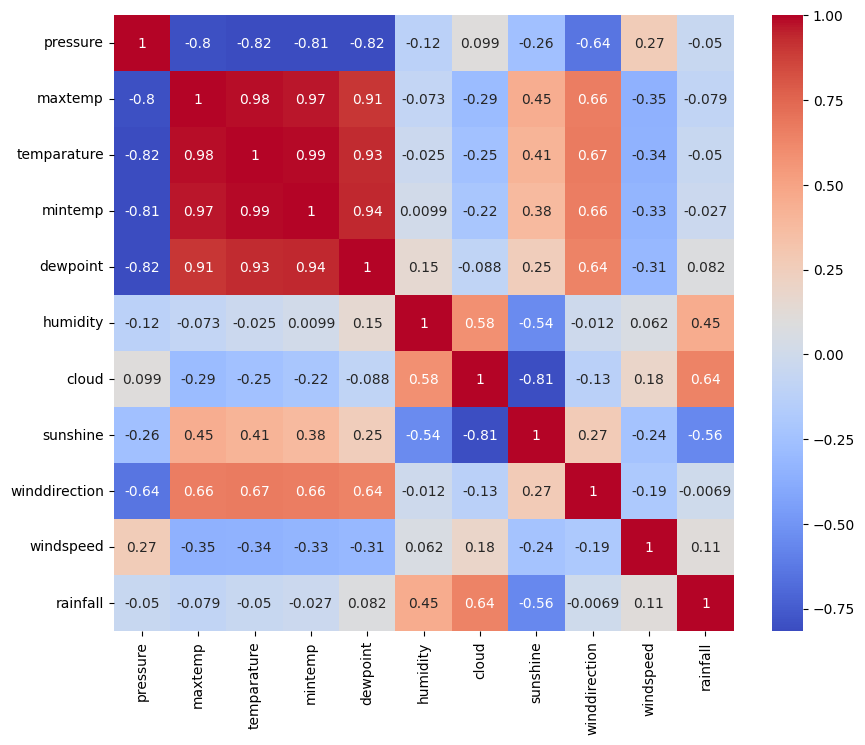

In [10]:
corr_df = train.drop(['id', 'day'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

## Feature Engineering

### Defining function

In [11]:
def pre_processing(df):
    # create a copy to avoid modifying the original
    df = df.copy()
    
    # creating cyclical features
    df['day_sin'] = np.sin(2 * np.pi * df['day']/365)
    df['day_cos'] = np.cos(2 * np.pi * df['day']/365)
    
    # create polynomial features
    df['cloud_squared'] = df['cloud']**2
    
    # creating interaction Features
    df['cloud_humidity'] = df['cloud'] * df['humidity']
    df['dewpoint_pressure'] = df['dewpoint'] / (df['pressure'] + 1e-5)
    
    # creating threshold Feature
    df['high_cloud'] = (df['cloud'] > df['cloud'].mean()).astype(int)
    
    return df

In [12]:
def pre_processing_v2(df):
    # create a copy to avoid modifying the original
    df = df.copy()
    
    # 1. cyclical features
    df['day_sin'] = np.sin(2 * np.pi * df['day']/365)
    df['day_cos'] = np.cos(2 * np.pi * df['day']/365)
    
    # 2. cloud transformations (top predictor)
    df['cloud_squared'] = df['cloud']**2
    df['cloud_cubic'] = df['cloud']**3
    df['log_cloud'] = np.log1p(df['cloud'])
    
    # 3. sunshine transformations (top negative predictor)
    df['sunshine_squared'] = df['sunshine']**2
    df['log_sunshine'] = np.log1p(df['sunshine'] + 0.1)
    
    # 4. interaction features (between important predictors)
    df['cloud_humidity'] = df['cloud'] * df['humidity']
    df['cloud_sunshine'] = df['cloud'] * df['sunshine']  # Key interaction between opposite effect features
    df['humidity_sunshine'] = df['humidity'] * df['sunshine']
    df['dewpoint_humidity'] = df['dewpoint'] * df['humidity']
    df['dewpoint_pressure'] = df['dewpoint'] / (df['pressure'] + 1e-5)
    
    # 5. threshold features (binary indicators for high-risk conditions)
    df['high_cloud'] = (df['cloud'] > df['cloud'].mean()).astype(int)
    df['low_sunshine'] = (df['sunshine'] < df['sunshine'].mean()).astype(int)
    df['high_humidity'] = (df['humidity'] > df['humidity'].mean()).astype(int)
    
    # 6. rain prediction index (weighted combination of key factors)
    df['rain_index'] = (0.6 * df['cloud'] - 
                        0.4 * df['sunshine'] + 
                        0.3 * df['humidity'] + 
                        0.2 * df['dewpoint'] - 
                        0.1 * df['pressure'])
    
    # 7. extreme weather indicators (top and bottom percentiles)
    df['extreme_cloud'] = (df['cloud'] > df['cloud'].quantile(0.8)).astype(int)
    df['very_low_sunshine'] = (df['sunshine'] < df['sunshine'].quantile(0.2)).astype(int)
    
    return df

### Splitting Data 

In [13]:
processed_train = pre_processing_v2(train)

# storing IDs separately before splitting (if needed for later)
ids = processed_train['id'].copy()

# drop ID column when creating feature matrix
X = processed_train.drop(['id', 'day', 'rainfall'], axis=1)  
y = processed_train['rainfall']

# splitting data into train and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (1752, 28), (1752,)
Testing set: (438, 28), (438,)


## Fitting Models

Training Logistic Regression...
Logistic Regression - ROC AUC: 0.8806


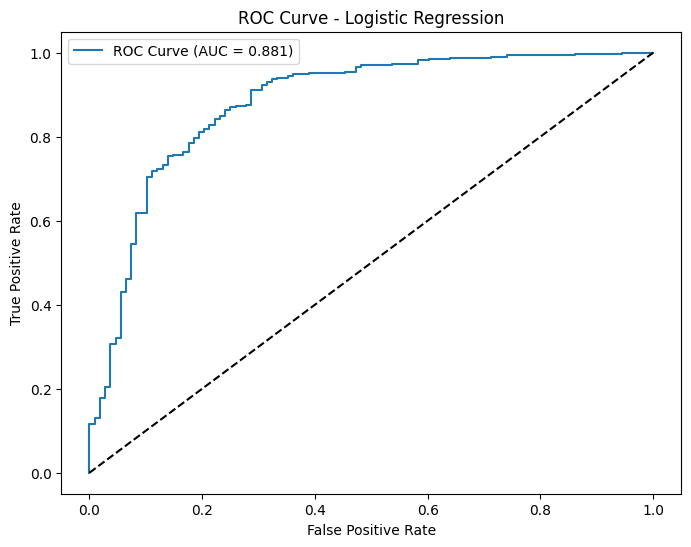

Training Random Forest...
Random Forest - ROC AUC: 0.8772


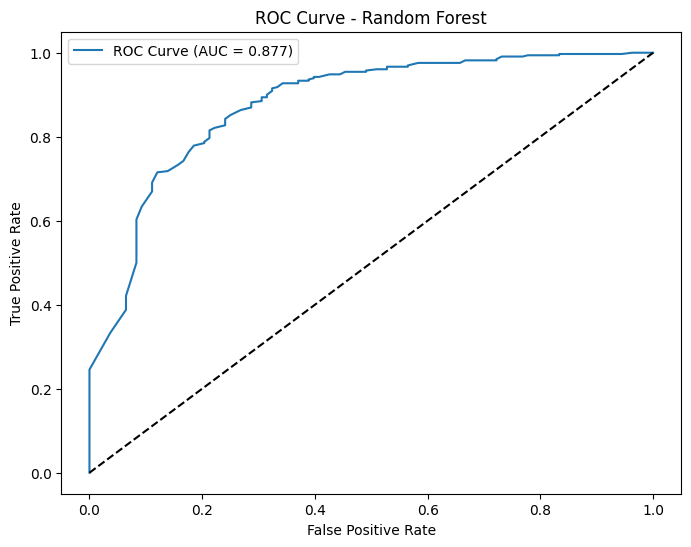

Training Gradient Boosting...
Gradient Boosting - ROC AUC: 0.8763


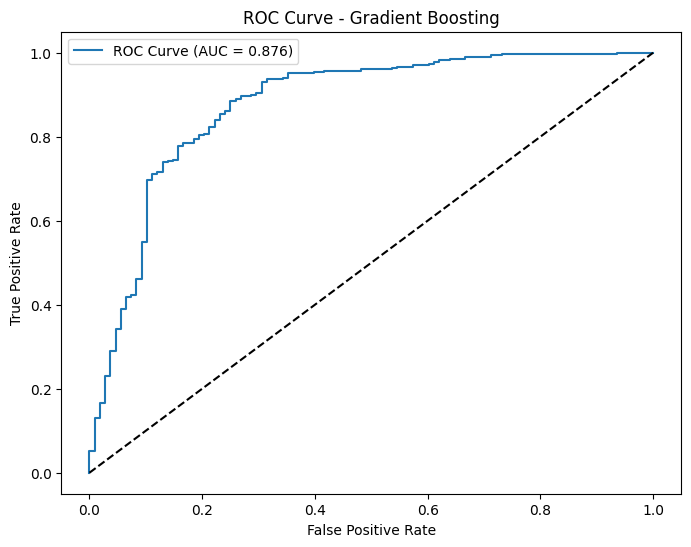

Training SVM...
SVM - ROC AUC: 0.8529


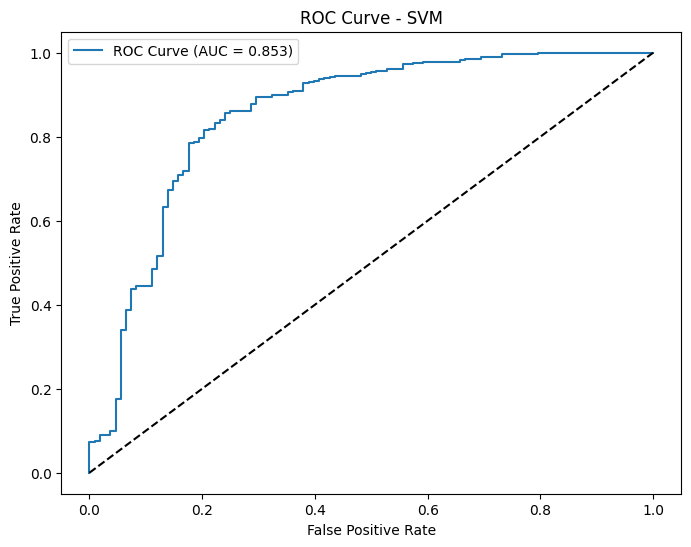


Best model: Logistic Regression with ROC AUC: 0.8806

Performing cross-validation to verify stability...
Cross-validation ROC AUC scores: [0.92143659 0.85914703 0.87651515 0.90998878 0.89921437]
Mean CV ROC AUC: 0.8933 (±0.0226)


In [14]:
# defining models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# dict to store ROC AUC scores
results = {}

# iterating though models and evaluating 
for name, model in models.items():
    print(f"Training {name}...")
    
    # fitting model
    model.fit(X_train, y_train)
    
    # getting probability predictions (for class 1)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)
    
    # calculating ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    results[name] = {
        'roc_auc': roc_auc,
        'model': model
    }
    
    # printing performance
    print(f"{name} - ROC AUC: {roc_auc:.4f}")
    
    # plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.show()

# finding the best model based on ROC AUC
best_model_name = max(results, key=lambda x: results[x]['roc_auc'])
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name} with ROC AUC: {results[best_model_name]['roc_auc']:.4f}")

# cross-validation to confirm performance is stable
print("\nPerforming cross-validation to verify stability...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='roc_auc')
print(f"Cross-validation ROC AUC scores: {cv_scores}")
print(f"Mean CV ROC AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

## Hyperparameter Optimizing LogisticRegression

In [15]:
# defining pipeline
pipeline =  Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# defining hyperparameters
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear'],
    'model__max_iter': [1000, 1500, 2000],
    'model__class_weight': ['balanced', None]
} 

# search grid for best hyperparameters
search = GridSearchCV(
    pipeline, 
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# fitting the model
search.fit(X_train, y_train)

# print results
print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)

# using the best model for predictions
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'model__C': 0.01, 'model__class_weight': None, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best score: 0.897077734036435


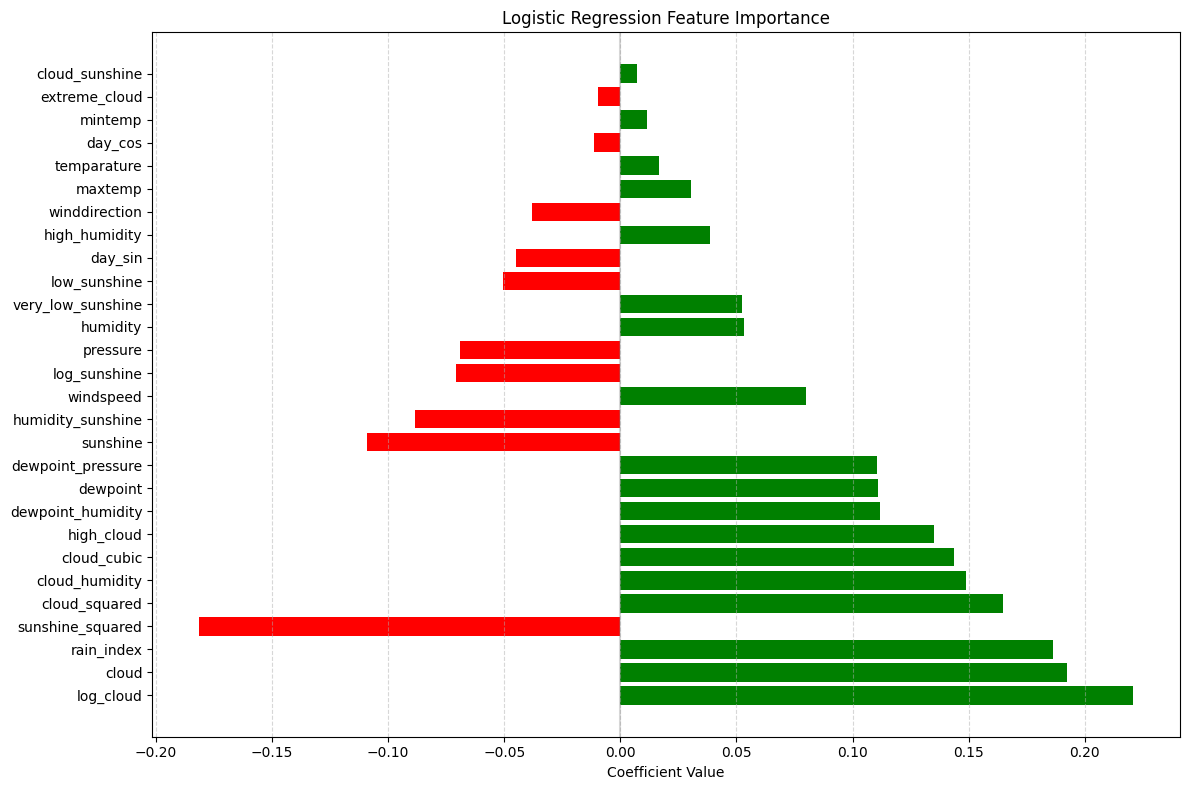

Top 15 Features by Importance:
              Feature  Coefficient  Absolute
14          log_cloud     0.220848  0.220848
6               cloud     0.192149  0.192149
25         rain_index     0.186361  0.186361
15   sunshine_squared    -0.181374  0.181374
12      cloud_squared     0.164907  0.164907
17     cloud_humidity     0.148800  0.148800
13        cloud_cubic     0.143583  0.143583
22         high_cloud     0.135008  0.135008
20  dewpoint_humidity     0.112004  0.112004
4            dewpoint     0.110838  0.110838
21  dewpoint_pressure     0.110546  0.110546
7            sunshine    -0.109189  0.109189
19  humidity_sunshine    -0.088510  0.088510
9           windspeed     0.079956  0.079956
16       log_sunshine    -0.070543  0.070543
0            pressure    -0.069020  0.069020
5            humidity     0.053270  0.053270
27  very_low_sunshine     0.052440  0.052440
23       low_sunshine    -0.050395  0.050395
10            day_sin    -0.044882  0.044882
24      high_humidity   

In [16]:
# Extract feature importance from your trained logistic regression model
def plot_logistic_regression_importance(model, feature_names):
    # Get the logistic regression coefficients
    coef = model.named_steps['model'].coef_[0]
    
    # Create a DataFrame of features and their importance
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coef,
        'Absolute': np.abs(coef)
    })
    
    # Sort by absolute coefficient value (descending)
    importance = importance.sort_values('Absolute', ascending=False)
    
    # Plot
    plt.figure(figsize=(12, 8))
    colors = ['red' if c < 0 else 'green' for c in importance['Coefficient']]
    plt.barh(importance['Feature'], importance['Coefficient'], color=colors)
    plt.title('Logistic Regression Feature Importance')
    plt.xlabel('Coefficient Value')
    plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    return importance

# Get feature names from your training data
feature_names = X_train.columns.tolist()

# Plot feature importances
importance_df = plot_logistic_regression_importance(best_model, feature_names)

# Print top 15 most important features
print("Top 15 Features by Importance:")
print(importance_df)

## Predicting on the test set with LogisticRegression

In [21]:
# Store the IDs for submission
test_ids = test['id'].copy()

# Check for missing values in test data
print("Missing values in test data:")
print(test.isna().sum())

# Process the test data
test_processed = pre_processing_v2(test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'

# Drop the ID column
X_test_submission = test_processed.drop(['id', 'day'], axis=1)

# Check for missing values after preprocessing
print("\nMissing values after preprocessing:")
print(X_test_submission.isna().sum())

# Impute missing values
X_test_submission_imputed = pd.DataFrame(
    imputer.fit_transform(X_test_submission),
    columns=X_test_submission.columns
)

# Make sure all columns are in the same order as training
X_test_submission_imputed = X_test_submission_imputed[X_train.columns]

# Verify no missing values remain
print("\nMissing values after imputation:")
print(X_test_submission_imputed.isna().sum().sum())

# Make predictions
y_pred_proba = best_model.predict_proba(X_test_submission_imputed)[:, 1]

# Create submission dataframe
submission = pd.DataFrame({
    'id': test_ids,
    'rainfall': y_pred_proba  # Use probabilities, not binary predictions
})

# save submission
output_folder = 'submissions'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

print(f"\nSubmission file created with {len(submission)} predictions")
print(submission.head())

Missing values in test data:
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

Missing values after preprocessing:
pressure             0
maxtemp              0
temparature          0
mintemp              0
dewpoint             0
humidity             0
cloud                0
sunshine             0
winddirection        1
windspeed            0
day_sin              0
day_cos              0
cloud_squared        0
cloud_cubic          0
log_cloud            0
sunshine_squared     0
log_sunshine         0
cloud_humidity       0
cloud_sunshine       0
humidity_sunshine    0
dewpoint_humidity    0
dewpoint_pressure    0
high_cloud           0
low_sunshine         0
high_humidity        0
rain_index           0
extreme_cloud        0
very_low_sunshine    0
dtype: int64

Missing values after imputation:
0


## Hyperparameter Optimizing XGBClassifier 

In [18]:
# defining pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(eval_metric='logloss'))  # Initialize XGBoost
])

# defining hyperparameters
param_grid = {
    'model__n_estimators': [100, 200, 300],  # Number of boosting rounds
    'model__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'model__max_depth': [3, 4, 5],  # Maximum depth of a tree
    'model__subsample': [0.8, 1.0],  # Subsample ratio of the training instance
    'model__colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'model__gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'model__reg_alpha': [0, 0.1, 1],  # L1 regularization term on weights
    'model__reg_lambda': [0, 0.1, 1]  # L2 regularization term on weights
}

# search grid for best hyperparameters
search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# fitting the model
search.fit(X_train, y_train)

# print results
print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)

# using the best model for predictions
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best parameters: {'model__colsample_bytree': 0.8, 'model__gamma': 0.1, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__reg_alpha': 1, 'model__reg_lambda': 1, 'model__subsample': 0.8}
Best score: 0.8923956890476538
